In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from konlpy.tag import Okt
from collections import Counter


#한글폰트
import matplotlib.font_manager as fm
import matplotlib as mpl
font_name  = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font',family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from wordcloud import WordCloud, STOPWORDS
import nltk

In [42]:
list_df = pd.read_csv("data/insta/00_noun_tags_count.csv")
content_list_df = pd.read_csv("data/insta/00_noun_content_count.csv")

In [43]:
list_df2= list_df.drop([list_df.index[0],list_df.index[1],list_df.index[2],list_df.index[3],list_df.index[4],list_df.index[16]
                      ,list_df.index[7],list_df.index[8],list_df.index[18],])
list_df3= list_df2[0:9]

In [44]:
list_df3

,Unnamed: 0,tags 명사,빈도수
5,5,수분,3775
6,6,케어,3328
9,9,미백,2130
10,10,스킨,2087
11,11,히알루론산,1681
12,12,진정,1579
13,13,앰플세럼,1504
14,14,피부관리,1485
15,15,보습,1475


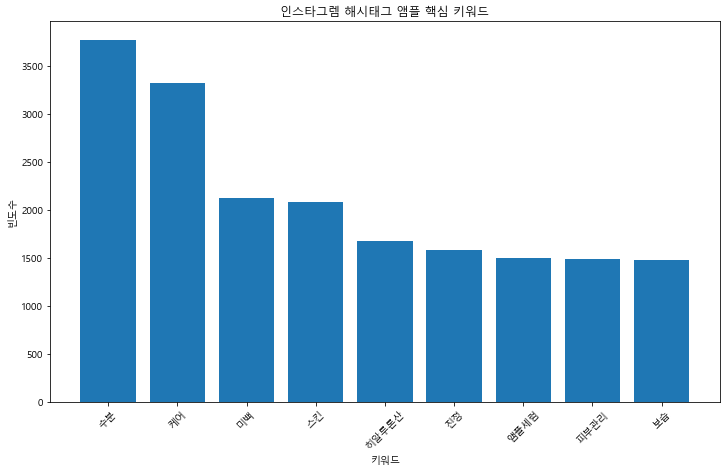

In [45]:
#그래프 전체 크기
plt.figure(figsize=(12, 7))
# 타이틀 설정
plt.title('인스타그렘 해시태그 앰플 핵심 키워드')
# 라벨 각도
plt.xticks(rotation=45)
# x축 라벨 설정
plt.xlabel('키워드')
# x축 라벨 설정
plt.ylabel('빈도수')
# 선 그래프(x, y)
#plt.plot(df['index'], df['price'])
# 막대 그래프(x, y)
plt.bar(list_df3['tags 명사'], list_df3['빈도수'])
# 그래프 출력
plt.show()

In [46]:
content_list_df

,Unnamed: 0,content 명사,빈도수
0,0,앰플,31108
1,1,피부,24763
2,2,수분,7940
3,3,화장품,6607
4,4,추천,6570
5,5,케어,6174
6,6,제품,5259
7,7,사용,5093
8,8,뷰티,4621
9,9,보습,4078


In [47]:
content_list_df2= content_list_df.drop([content_list_df.index[0],content_list_df.index[1]])

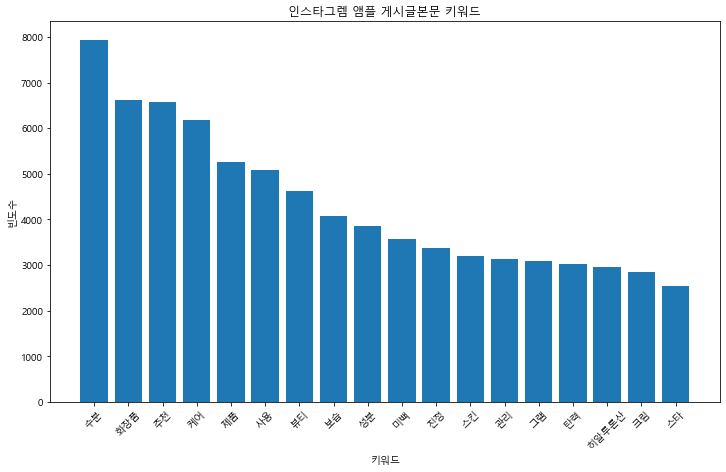

In [48]:
#그래프 전체 크기
plt.figure(figsize=(12, 7))
# 타이틀 설정
plt.title('인스타그렘 앰플 게시글본문 키워드')
# 라벨 각도
plt.xticks(rotation=45)
# x축 라벨 설정
plt.xlabel('키워드')
# x축 라벨 설정
plt.ylabel('빈도수')
# 선 그래프(x, y)
#plt.plot(df['index'], df['price'])
# 막대 그래프(x, y)
plt.bar(content_list_df2['content 명사'], content_list_df2['빈도수'])
# 그래프 출력
plt.show()

(-0.5, 399.5, 199.5, -0.5)

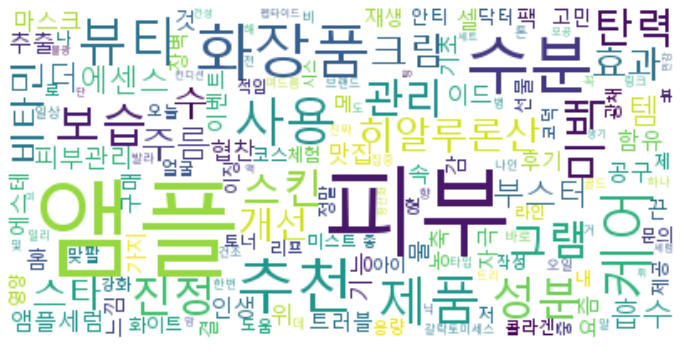

In [51]:
ko_text=open("data/insta/content.txt", 'r',encoding = 'utf-8').read()
ko_text

# 형태소 분석
okt = Okt()
token_ko = okt.nouns(ko_text)
token_ko

# 불용어 처리
stop_words = ["럼", "앰", "분", "이", "을", "후", "때"]
token_ko = [each_word for each_word in token_ko if each_word not in stop_words]

# 워드 카운팅
ko = nltk.Text(token_ko, name="content")
data = ko.vocab().most_common(150)

wordcloud = WordCloud(background_color="white", 
                     font_path= "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

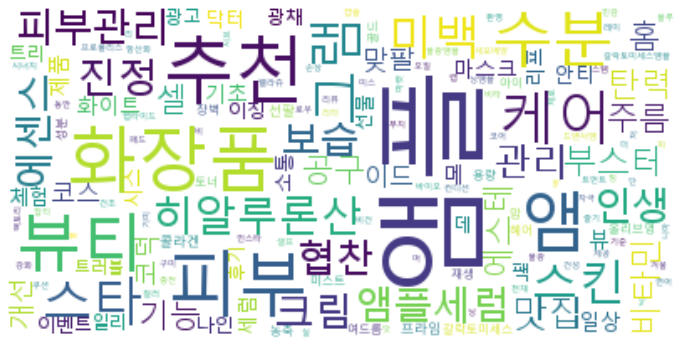

In [52]:
ko_text=open("data/insta/tags.txt", 'r',encoding = 'utf-8').read()
ko_text

# 형태소 분석
okt = Okt()
token_ko = okt.nouns(ko_text)
token_ko

# 불용어 처리
stop_words = ["그", "램", "템", "위", "럼", "망", "휘"]
token_ko = [each_word for each_word in token_ko if each_word not in stop_words]

# 워드 카운팅
ko = nltk.Text(token_ko, name="tags")
data = ko.vocab().most_common(150)

wordcloud = WordCloud(background_color="white", 
                     font_path= "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")